In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tqdm
import matplotlib as mpl
import sys

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, dist, calc_ang, sink_positions, dist
from pipeline_2D import to_osyris_ivs
from plotting_setup import *

In [2]:
data = pipeline(snap = 223, run = 's13_09_servoF', sink_id=13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 2753/2753 [00:12<00:00, 220.88it/s]


In [3]:
def get_level(acc_cells):
    acc_level = []
    for p in data.sn.patches:
        acc_level.extend(p.level * np.ones(np.sum([p.dist_xyz < r_acc(acc_cells)])))
    acc_level = np.array(acc_level) 
    return acc_level 

In [4]:
r_acc = lambda acc_cells: acc_cells * 0.5**data.lmax
n_cells = np.arange(4, 34, 4)
radii_hist = {n : [] for n in n_cells}
for n in tqdm.tqdm(n_cells):
    radii_hist[n] = get_level(n)



  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 14.14it/s]


In [5]:
bin_edges = np.arange(10.5, data.lmax + 1.5, 1)

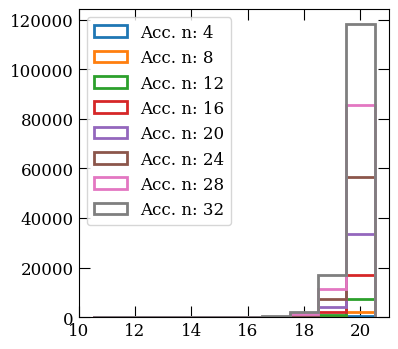

In [7]:
fig, axs = plt.subplots(figsize = (4,4))

for i, n in enumerate(n_cells):
    plt.hist(radii_hist[n], bins = bin_edges, histtype = 'step', label = f'Acc. n: {n}', lw = 2)

axs.set_xticks(np.arange(10,data.lmax+2,2));
plt.legend(loc = 'upper left')